# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# set up lists to hold reponse info
city_name=[]
country_name=[]
lat = []
lng = []
temp_max = []
humidity = []
clouds = []
wind_speed = []
date = []


# Loop through the list of cities and perform a request for data on each
count=0
print("Start API Call to OpenWeather Database ")
print("---------------------------------------")

for city in cities:
    try:
        count += 1
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        country_name.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        print(f"Processing record {count} for the city: {city}")
    
    except:
        #cities.remove(city)
        print(f"{city} not found in OpenWeather database.")
        pass

    print("---------------------------------------")


Start API Call to OpenWeather Database 
---------------------------------------
Processing record 1 for the city: cape town
---------------------------------------
Processing record 2 for the city: mahebourg
---------------------------------------
Processing record 3 for the city: hobart
---------------------------------------
Processing record 4 for the city: rikitea
---------------------------------------
Processing record 5 for the city: vaini
---------------------------------------
Processing record 6 for the city: naryan-mar
---------------------------------------
Processing record 7 for the city: ribeira grande
---------------------------------------
Processing record 8 for the city: bluff
---------------------------------------
Processing record 9 for the city: busselton
---------------------------------------
Processing record 10 for the city: liverpool
---------------------------------------
Processing record 11 for the city: inta
---------------------------------------
Proces

Processing record 99 for the city: chuy
---------------------------------------
Processing record 100 for the city: pacifica
---------------------------------------
Processing record 101 for the city: saskylakh
---------------------------------------
Processing record 102 for the city: orchard homes
---------------------------------------
Processing record 103 for the city: lompoc
---------------------------------------
Processing record 104 for the city: dolinsk
---------------------------------------
Processing record 105 for the city: troitskoye
---------------------------------------
grand river south east not found in OpenWeather database.
---------------------------------------
Processing record 107 for the city: camopi
---------------------------------------
Processing record 108 for the city: college
---------------------------------------
Processing record 109 for the city: mabaruma
---------------------------------------
Processing record 110 for the city: saldanha
----------

Processing record 198 for the city: merauke
---------------------------------------
Processing record 199 for the city: altamont
---------------------------------------
Processing record 200 for the city: hamilton
---------------------------------------
Processing record 201 for the city: evensk
---------------------------------------
Processing record 202 for the city: auki
---------------------------------------
Processing record 203 for the city: nanortalik
---------------------------------------
mahaicony not found in OpenWeather database.
---------------------------------------
Processing record 205 for the city: big rapids
---------------------------------------
Processing record 206 for the city: umea
---------------------------------------
Processing record 207 for the city: zyryanka
---------------------------------------
Processing record 208 for the city: sam phran
---------------------------------------
attawapiskat not found in OpenWeather database.
-----------------------

Processing record 296 for the city: elblag
---------------------------------------
Processing record 297 for the city: malartic
---------------------------------------
Processing record 298 for the city: hami
---------------------------------------
Processing record 299 for the city: the valley
---------------------------------------
Processing record 300 for the city: mayumba
---------------------------------------
Processing record 301 for the city: aksarka
---------------------------------------
Processing record 302 for the city: makow mazowiecki
---------------------------------------
Processing record 303 for the city: druzhba
---------------------------------------
Processing record 304 for the city: nicoya
---------------------------------------
Processing record 305 for the city: vardo
---------------------------------------
Processing record 306 for the city: zhanaozen
---------------------------------------
Processing record 307 for the city: san carlos
---------------------

Processing record 392 for the city: zhigansk
---------------------------------------
Processing record 393 for the city: contamana
---------------------------------------
Processing record 394 for the city: melo
---------------------------------------
sinkat not found in OpenWeather database.
---------------------------------------
Processing record 396 for the city: eureka
---------------------------------------
Processing record 397 for the city: nortelandia
---------------------------------------
Processing record 398 for the city: high level
---------------------------------------
Processing record 399 for the city: sinnamary
---------------------------------------
Processing record 400 for the city: katsuura
---------------------------------------
Processing record 401 for the city: ahipara
---------------------------------------
Processing record 402 for the city: ilulissat
---------------------------------------
Processing record 403 for the city: praia
-------------------------

Processing record 490 for the city: sambava
---------------------------------------
Processing record 491 for the city: tambura
---------------------------------------
Processing record 492 for the city: road town
---------------------------------------
Processing record 493 for the city: maragogi
---------------------------------------
Processing record 494 for the city: lazaro cardenas
---------------------------------------
Processing record 495 for the city: manokwari
---------------------------------------
umm durman not found in OpenWeather database.
---------------------------------------
Processing record 497 for the city: coari
---------------------------------------
Processing record 498 for the city: sabha
---------------------------------------
Processing record 499 for the city: mandan
---------------------------------------
Processing record 500 for the city: pochutla
---------------------------------------
Processing record 501 for the city: la rochelle
-----------------

Processing record 587 for the city: chiang klang
---------------------------------------
Processing record 588 for the city: cordeiro
---------------------------------------
Processing record 589 for the city: sandwick
---------------------------------------
Processing record 590 for the city: belaya gora
---------------------------------------
Processing record 591 for the city: wamba
---------------------------------------
Processing record 592 for the city: labuhan
---------------------------------------
Processing record 593 for the city: noyabrsk
---------------------------------------
Processing record 594 for the city: tiksi
---------------------------------------
Processing record 595 for the city: takoradi
---------------------------------------
Processing record 596 for the city: changji
---------------------------------------
alotau not found in OpenWeather database.
---------------------------------------
Processing record 598 for the city: tigil
---------------------------

In [5]:
len(city_name)


567

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create a data frame from cities, lat, temp, humidity, cloudiness, and wind speed.
weather_dict = {
    "City": city_name,
    "Country": country_name,
    "Latitude": lat,
    "Longitude": lng,
    "Temperature (F)": temp_max,
    "Humidity (%)": humidity,
    "Cloudiness (%)": clouds,
    "Wind Speed (mph)": wind_speed,
    "Date": date
    
    
}
weather_data = pd.DataFrame(weather_dict)

#Form https://www.programiz.com/python-programming/datetime/timestamp-datetime
now = datetime.now()

#Export weather data to csv.
weather_data.to_csv("weather_data.csv", encoding="utf-8", index=False)

#Display df.
weather_data.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,Cape Town,ZA,-33.9258,18.4232,73.99,56,0,19.57,1611157937
1,Mahébourg,MU,-20.4081,57.7000,82.40,83,20,8.05,1611158145
2,Hobart,AU,-42.8794,147.3294,50.00,87,9,6.91,1611157954
3,Rikitea,PF,-23.1203,-134.9692,78.13,75,37,14.72,1611158145
4,Vaini,TO,-21.2000,-175.2000,77.00,100,75,2.30,1611158145


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
hi_hum = weather_data.loc[weather_data['Humidity (%)'] > 100]
print(hi_hum)

Empty DataFrame
Columns: [City, Country, Latitude, Longitude, Temperature (F), Humidity (%), Cloudiness (%), Wind Speed (mph), Date]
Index: []


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

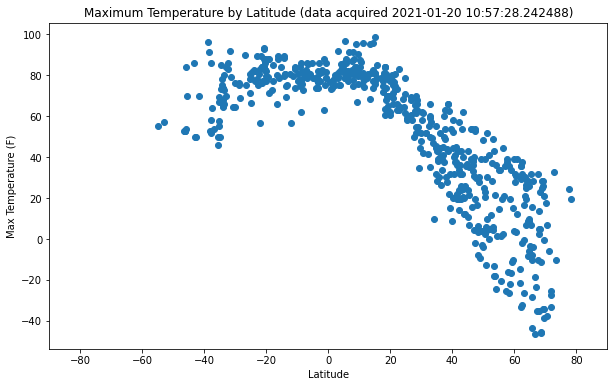

In [8]:
x_values = weather_data['Latitude']
y_values = weather_data['Temperature (F)']

plt.figure(1, figsize=(10, 6))
plt.scatter(x_values, y_values)
plt.xlim(-90,90,10)
plt.title('Maximum Temperature by Latitude (data acquired ' + str(now) + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('world_temp_lat.png')
plt.show()



This plot demonstrates that maximum daily temperature does go down as one moves further away from the equator (both North and South). Max. Temp. at latitudes further away from the equator are higher in the southern hemisphere than in the northern hemisphere currently. This latter observation is perhaps explained by the southern hemisphere being in summer, while the northern hemisphere is in winter currently. Due to the tilt of the Earth's axis, the southern hemisphere is facing to the sun and the northern hemisphere is facing away from the sun.

## Latitude vs. Humidity Plot

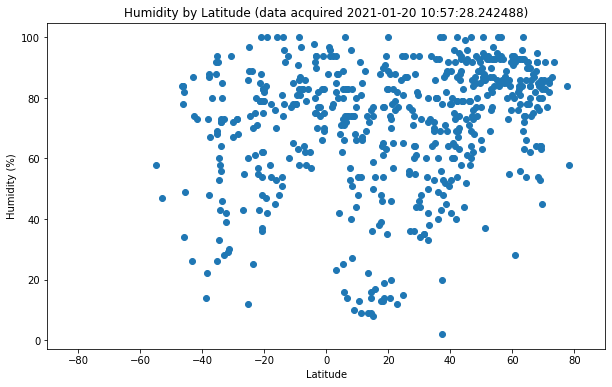

In [9]:
x_values = weather_data['Latitude']
y_values = weather_data['Humidity (%)']


plt.figure(1, figsize=(10, 6))
plt.scatter(x_values, y_values)
plt.xlim(-90,90,10)
plt.title('Humidity by Latitude (data acquired ' + str(now) + ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('world_hum_lat.png')
plt.show()



This plot demonstrates that there is no particular relationship between percent humidity and latitude. There is some clumping of points in the 80% to 100% humidity at latitudes above 40 degrees north, but no clear correlation to my eye.

## Latitude vs. Cloudiness Plot

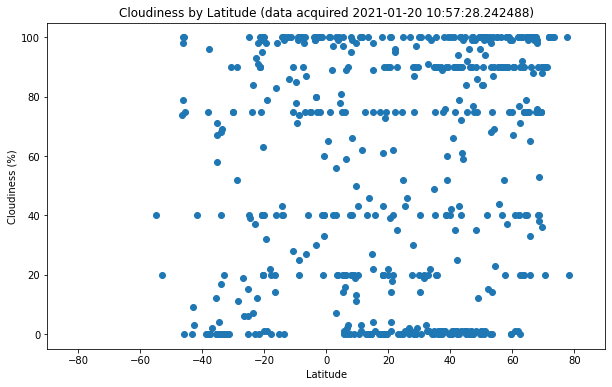

In [10]:
x_values = weather_data['Latitude']
y_values = weather_data['Cloudiness (%)']


plt.figure(1, figsize=(10, 6))
plt.scatter(x_values, y_values)
plt.xlim(-90,90,10)
plt.title('Cloudiness by Latitude (data acquired ' + str(now) + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('world_cloud_lat.png')
plt.show()

This plot demonstrates that there is no clear relationship between cloudiness and latitude. There is some clumping of data at 0%, 20%, 40%, ~75%, and 100%. This makes me think of human error in assigning the values.

## Latitude vs. Wind Speed Plot

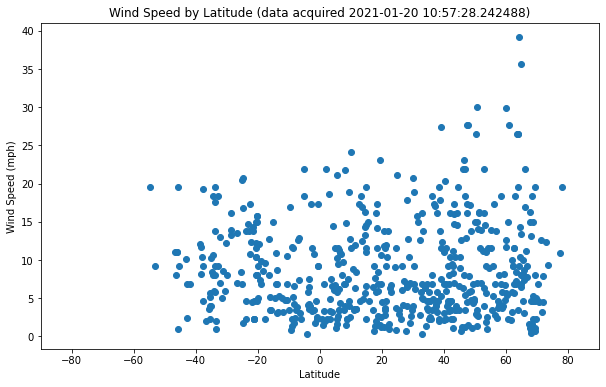

In [11]:
x_values = weather_data['Latitude']
y_values = weather_data['Wind Speed (mph)']

plt.figure(1, figsize=(10, 6))
plt.scatter(x_values, y_values)
plt.xlim(-90,90,10)
plt.title('Wind Speed by Latitude (data acquired ' + str(now) + ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('world_wspeed_lat.png')
plt.show()


I see no clear relationship between wind speed and latitude on this plot.

## Linear Regression

In [12]:
nh_data = weather_data.loc[weather_data['Latitude'] >=0]
sh_data = weather_data.loc[weather_data['Latitude'] <0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

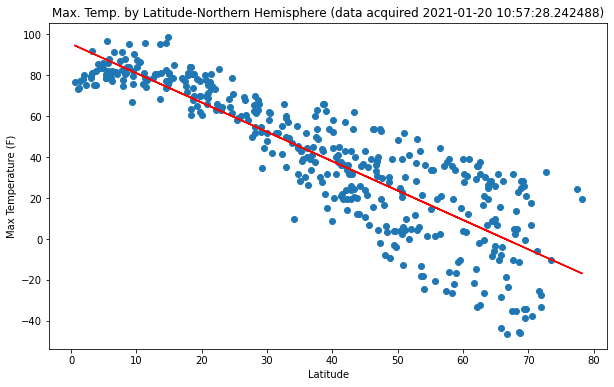

The Pearson correlation coefficient between Max. Temp (F) and Latitude in the Northern Hemisphere is -0.87


In [13]:
x_values = nh_data['Latitude']
y_values = nh_data['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(1,figsize=(10,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Max. Temp. by Latitude-Northern Hemisphere (data acquired ' + str(now) + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
#plt.savefig('nh_temp_lat.png')
plt.show()

print(f"The Pearson correlation coefficient between Max. Temp (F) and Latitude in the Northern Hemisphere is {round(st.pearsonr(x_values, y_values)[0],2)}")



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

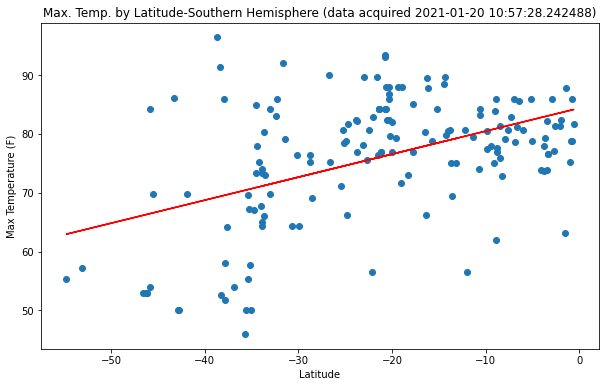

The Pearson correlation coefficient between Max. Temp (F) and Latitude in the Southern Hemisphere is 0.48


In [14]:
x_values = sh_data['Latitude']
y_values = sh_data['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(1,figsize=(10,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Max. Temp. by Latitude-Southern Hemisphere (data acquired ' + str(now) + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
#plt.savefig('sh_temp_lat.png')
plt.show()

print(f"The Pearson correlation coefficient between Max. Temp (F) and Latitude in the Southern Hemisphere is {round(st.pearsonr(x_values, y_values)[0],2)}")

Analysis of Max. Temp. by latitude in both the southern and northern hemispheres show a strong correlation with the Max. Temp. getting higher as we get closer to the equator. In the southern hemisphere this manifests as a positve correlation (equator is on the right of the x-axis), in the northern hemisphere a negative correlation describes the same trend (equator is on the left of the x-axis).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

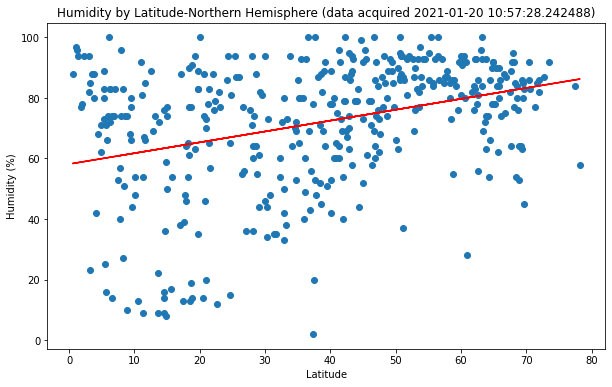

The Pearson correlation coefficient between Humidity (%) and Latitude in the Northern Hemisphere is 0.34


In [15]:
x_values = nh_data['Latitude']
y_values = nh_data['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(1,figsize=(10,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Humidity by Latitude-Northern Hemisphere (data acquired ' + str(now) + ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
#plt.savefig('nh_hum_lat.png')
plt.show()

print(f"The Pearson correlation coefficient between Humidity (%) and Latitude in the Northern Hemisphere is {round(st.pearsonr(x_values, y_values)[0],2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

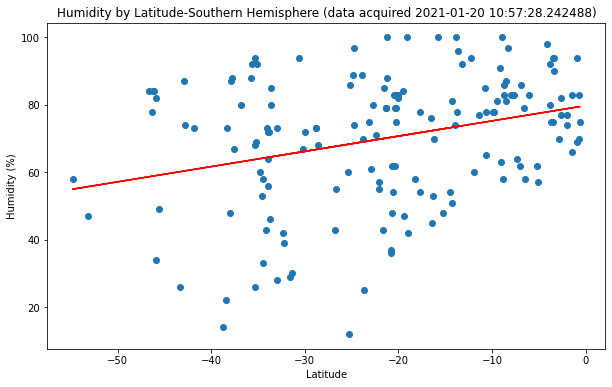

The Pearson correlation coefficient between Humidity (%) and Latitude in the Southern Hemisphere is 0.31


In [16]:
x_values = sh_data['Latitude']
y_values = sh_data['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(1,figsize=(10,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Humidity by Latitude-Southern Hemisphere (data acquired ' + str(now) + ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
#plt.savefig('sh_hum_lat.png')
plt.show()

print(f"The Pearson correlation coefficient between Humidity (%) and Latitude in the Southern Hemisphere is {round(st.pearsonr(x_values, y_values)[0],2)}")

In this analysis, humidity is increasing as we move further north from the equator and decreasing as we move further south from the equator. The Pearson correlation coefficient deonstrates a stronger correlation for the northern hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

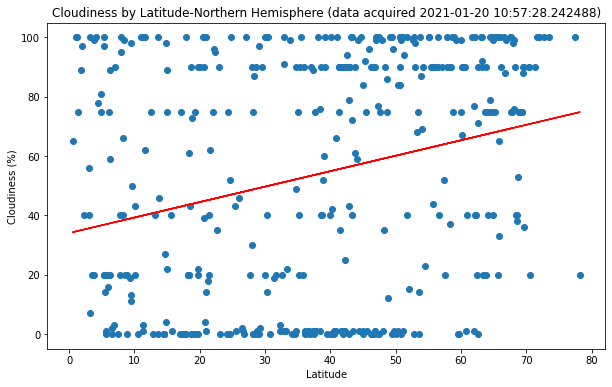

The Pearson correlation coefficient between Cloudiness (%) and Latitude in the Northern Hemisphere is 0.27


In [17]:
x_values = nh_data['Latitude']
y_values = nh_data['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(1,figsize=(10,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Cloudiness by Latitude-Northern Hemisphere (data acquired ' + str(now) + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
#plt.savefig('nh_cloud_lat.png')
plt.show()

print(f"The Pearson correlation coefficient between Cloudiness (%) and Latitude in the Northern Hemisphere is {round(st.pearsonr(x_values, y_values)[0],2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

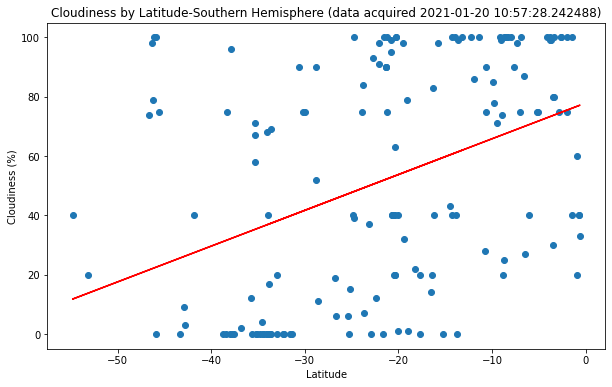

The Pearson correlation coefficient between Cloudiness (%) and Latitude in the Southern Hemisphere is 0.41


In [18]:
x_values = sh_data['Latitude']
y_values = sh_data['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(1,figsize=(10,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Cloudiness by Latitude-Southern Hemisphere (data acquired ' + str(now) + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
#plt.savefig('sh_cloud_lat.png')
plt.show()

print(f"The Pearson correlation coefficient between Cloudiness (%) and Latitude in the Southern Hemisphere is {round(st.pearsonr(x_values, y_values)[0],2)}")

Analysis of cloudiness versus latitude shows a slight trend for cloudiness to increase in the southern hemisphere as we move towards the equator. In the northern hemisphere, cloudiness is increasing as we move away from the equator. In both the northern and the southern hemispheres there are clumps around 0% and near 100%, but no clear correlation to latitude is evident to my eye.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

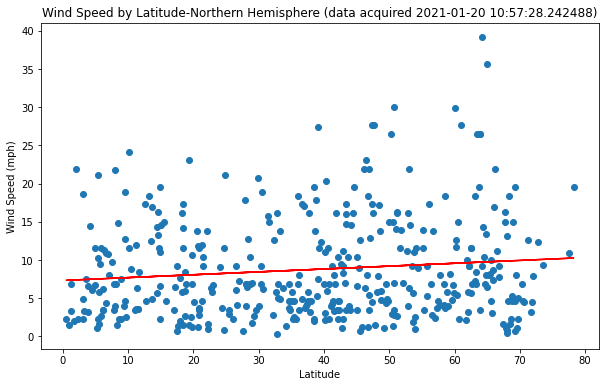

The Pearson correlation coefficient between Wind Speed and Latitude in the Northern Hemisphere is 0.12


In [19]:
x_values = nh_data['Latitude']
y_values = nh_data['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(1,figsize=(10,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Wind Speed by Latitude-Northern Hemisphere (data acquired ' + str(now) + ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
#plt.savefig('nh_ws_lat.png')
plt.show()

print(f"The Pearson correlation coefficient between Wind Speed and Latitude in the Northern Hemisphere is {round(st.pearsonr(x_values, y_values)[0],2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

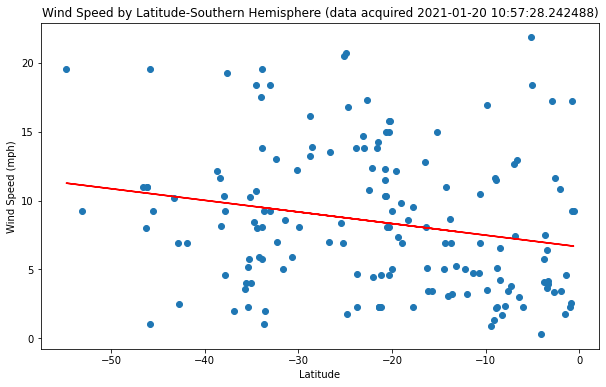

The Pearson correlation coefficient between Wind Speed and Latitude in the Southern Hemisphere is -0.21


In [20]:
x_values = sh_data['Latitude']
y_values = sh_data['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(1,figsize=(10,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Wind Speed by Latitude-Southern Hemisphere (data acquired ' + str(now) + ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
#plt.savefig('sh_ws_lat.png')
plt.show()

print(f"The Pearson correlation coefficient between Wind Speed and Latitude in the Southern Hemisphere is {round(st.pearsonr(x_values, y_values)[0],2)}")

These two plots show no correlation between wind speed and latitude in the northern hemisphere and a slight decrease in wind speed as we move towards the equator in the southern hemisphere. The correlation in the southern hemisphere appears weak.